In [5]:
from skimage.color import rgb2gray
import skimage.transform
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
import skimage.exposure

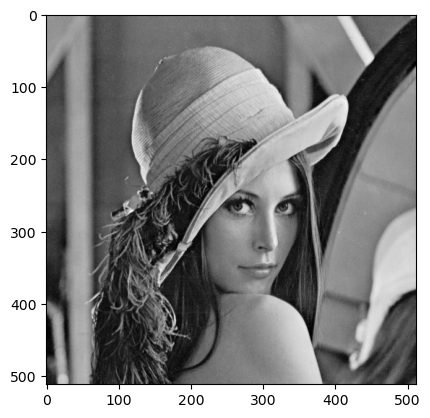

In [6]:
plt.gray() # makes image plots grayscale

lena = rgb2gray(imread('lena.tiff')) *255
cameraman = imread('cameraman.tif').astype(np.float64)
tire = imread('tire.tif').astype(np.float64) / 255.0

#plt.imshow(lena)


In [7]:
#sarah notes for PSNR

#input images
# np.sum
a = lena
b = lena

# cooper mse func
def mse(f, g):
#mse
	error = np.sum((f.astype(np.float64) - g.astype(np.float64)) ** 2)
	error /= float(f.shape[0] * g.shape[1])
	#return MSE
	return error

# cooper psnr func
def psnr(f, g):
	MAX_f = 255.0
	log = np.log10((MAX_f**2)/(mse(f, g))) 
	PSNR_out = 10*log
	return PSNR_out


print(mse(a, b))
print(psnr(a,b))

# COOPERS NOTE: this seems to work now
#Sarah's NOTE: not a fatal error but it is dividing by zero for some reason in this part: (MAX_f**2)/(mse(f, g))


0.0
inf


/var/folders/g2/xzgpr9fx6_5cvvl_x157b4qh0000gp/T/ipykernel_1038/872283170.py:19: RuntimeWarning: divide by zero encountered in scalar divide
  log = np.log10((MAX_f**2)/(mse(f, g)))


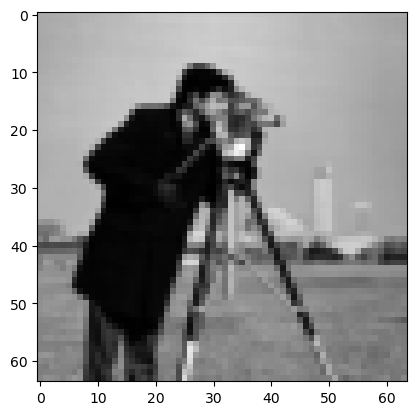

In [8]:
# pt 3: digital zooming

# load lena and cameraman and convert to grayscale
lena = rgb2gray(imread('lena.tiff'))
cameraman = imread('cameraman.tif') #don't need rgb2gray since image is black and white

#NOTE 1: cameraman is already b&w so it gets cranky when you try to convert to 
# grayscale since the channel data for colours is gone. 
# It seems to work now. Tire is also b&w for future ref.
# old: cameraman = rgb2gray(imread('cameraman.tif')[:,:3]) 


# reduce the resolution of the images by a factor of 4 in both the horizontal 
# and vertical direction using bilinear interpolation. Plot the down-sampled images
lena_ds = skimage.transform.rescale(lena.astype(np.float64), 0.25)
cameraman_ds = skimage.transform.rescale(cameraman.astype(np.float64), 0.25) # broken, see Note 1

plt.imshow(lena_ds)
plt.imshow(cameraman_ds)

# perform digital zooming to increase the resolution of 
# the down-sampled image back to the resolution of the original images using nni, bli, bci

#nni



#lena_us_nni = 
#cameraman_us_nni = 

#bli

#lena_us_bli = 
#cameraman_us_bli = 

#bci

#lena_us_bci = 
#cameraman_us_bci = 

# plot the up-sample images, compute the PSNR between the originals and up-sampled

#print(psnr(lena,lena_nni))
#print(psnr(cameraman,cameraman_nni))